<a href="https://colab.research.google.com/github/parekhakhil/pyImageSearch/blob/main/503_qrcode_with_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating QR code markers with OpenCV and Python

This notebook is associated with the [Generating Qr code markers with OpenCV and Python](https://analyticsindiamag.com/guide-to-generating-qrcode-and-scan-qrcode/)

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

### Import packages

In [18]:
!apt install zbar
!pip install qrcode
!pip install pyzbar
#this library it illustrates type: whether it is barcode or QRcode, data: the alphanumeric information is hidden in QRcode, and location: edges of the QRcode in the image.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package zbar


In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import qrcode
import argparse
import pyzbar #Pyzbar is an OpenCV module that is used to decode the QRcode

### Function to display images in Jupyter Notebooks and Google Colab

In [11]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [14]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="path to output image containing ArUCo tag")
# ap.add_argument("-i", "--id", type=int, required=True,
# 	help="ID of ArUCo tag to generate")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to generate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"link":"https://colab.research.google.com/"
}

<class 'qrcode.image.pil.PilImage'>
(370, 370)


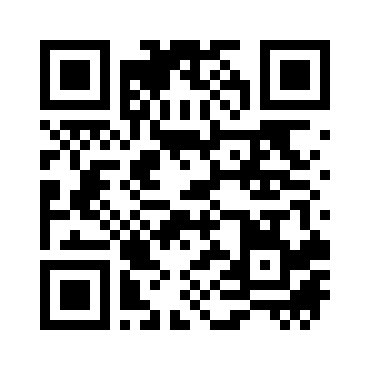

In [37]:
img = qrcode.make(args.get("link"))
print(type(img))
print(img.size)
img.save("/content/qr_colab.png")
png = cv2.imread("/content/qr_colab.png")
cv2_imshow(png)


https://colab.research.google.com/


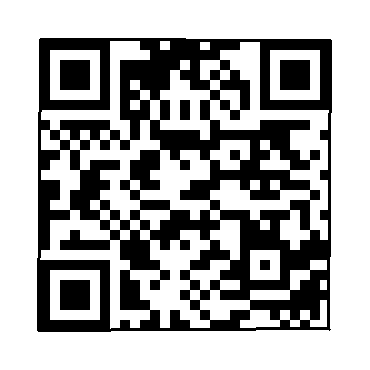

In [39]:
detector = cv2.QRCodeDetector()
#detectAndDecode() function takes an image as an input and returns a tuple of 3 values: the data decoded from the QR code, the output array of vertices of the found QR code quadrangle and the output image containing rectified and binarized QR code.
data,bbox,straight_qr = detector.detectAndDecode(png)
if(data):
    print(data)
if bbox is not None:
    for i in range(len(bbox)):
        pt1 = tuple(bbox[i][0])
        pt2 = tuple(bbox[(i+1)%len(bbox)][0])
        cv2.line(png,pt1,pt2,(0,0,0),2)
    cv2_imshow(png)


### Detect the qr code in video

In [ ]:
cap = cv2.VideoCapture()
detector = cv2.QRCodeDetector()
while True:
    _,frame = cap.read()
    data,bbox,_ = detector.detectAndDecode(frame)
    if bbox is not None:
        for i in range(len(bbox)):
        pt1 = tuple(bbox[i][0])
        pt2 = tuple(bbox[(i+1)%len(bbox)][0])
        cv2.line(frame,pt1,pt2,(0,0,0),2)
    frame.save("qr_detected.png")
    if data:
        print(f"Data extracted from qrcode is {data}")
    